#Project 1 Group 31

Task 1

In [ ]:
#importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib  import cm

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv
Saving Data2.csv to Data2.csv
Saving Data3.csv to Data3.csv
Saving Data4.csv to Data4.csv
Saving Data5.csv to Data5.csv
Saving Data6.csv to Data6.csv
Saving Data7.csv to Data7.csv
Saving Data8.csv to Data8.csv


The accuracy we get in the below clustering algorithms when we compare the predicted classes with true classes is ambiguous and inaccurate as true class values range between 0 to n and from clustering algorithms, we get labels 1 to n+1. Changing true class labels to 1 to n+1 or changing predicted labels to 0 to n won't make sense as the order might not be maintained. For example: records belonging to class 3 may be clustered as class 4 i.e. the order will not be maintained. Hence we get different accuracies when we keep running the algorithms. Anyway, we have displayed the 3d/2d plots of the data with predicted labels for the algorithm that gave a higher accuracy, though it doesn't make sense.

For external validation of KMeans and Hierarchial Clustering algorithms, we calculate the Accuracy and F1 Score. <BR>Formulas: <BR>Accuracy Score= Number of Correct Predictions/ Total Number of Predictions = (TP+TN)/(TP+FP+TN+FN) <BR>F1 Score= 2(Precision*Recall)/(Precision+Recall) = TP/(TP+.5(FP+FN))<BR> where TP= True Positive, TN = True Negative, FP = False Positive, FN = False Negative.

For internal validation of KMeans and Hierarchial clustering algorithms used in in Task 2, we use the CH Score, Dunn Index and SH Score.<br>
Formulas:<br>
Calinski-Harabasz Index = (SSBm*M)/((SSEm)(M-1)) (ratio between the internal
dispersion of clusters and the dispersion between clusters for M clusters)<br>
Dunn Index = DI m = (min1⩽i<j⩽m δ(Ci,Cj)) / (max1⩽k⩽m ∆k) (The lowest intercluster distance (ie. the smallest distance
between any two cluster centroids) divided by the highest
intracluster distance (ie. the largest distance between any
two points in any cluster))<br>
Silhoutte  Score = (b-a)/max(a,b); where <br>a = The mean distance between a sample and all other points in the same class. This score measure the closeness of points in the same cluster. <br>b = The mean distance between a sample and all other points in the next nearest cluster. This score measure the distance of points of different clusters.

#Data 1

In [ ]:
df1=pd.read_csv('Data1.csv')
df1.loc[df1['Class']==1, 'Class']=0
df1.loc[df1['Class']==2, 'Class']=1
df1.loc[df1['Class']==3, 'Class']=2
df1.loc[df1['Class']==4, 'Class']=3
df1.loc[df1['Class']==5, 'Class']=4
df1.loc[df1['Class']==6, 'Class']=5
df1.loc[df1['Class']==7, 'Class']=6
#Subset given dataset for K-means
df11= df1.iloc[:,1:4]

In [ ]:
#K-means

train_data = df1.iloc[:,1:4].values
mdl = KMeans(n_clusters=7)
mdl.fit(df1.iloc[:,1:4])
print('SSE: '+ str(mdl.inertia_))
y_clusters = mdl.fit_predict(train_data)
print('Accuracy: ', metrics.accuracy_score(df1['Class'], y_clusters))
print('F1-score: ', metrics.f1_score(df1.iloc[:,4],y_clusters, average='macro'))

SSE: 106.14764659310868
Accuracy:  0.5754716981132075
F1-score:  0.5714285714285714


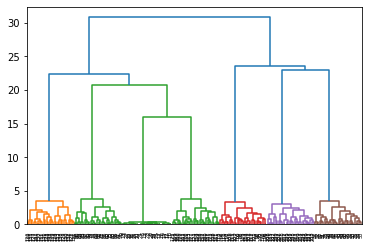

In [ ]:
#Dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
data = list(zip(list(df1.iloc[:,1]),list(df1.iloc[:,2]),list(df1.iloc[:,3])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#hierarchial clustering method
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print('Accuracy: ', metrics.accuracy_score(df1['Class'], labels))
print('F1-score: ', metrics.f1_score(df1.iloc[:,4],labels, average='macro'))

Accuracy:  0.14150943396226415
F1-score:  0.14285714285714285


In [ ]:
#3d plot of the data with true labels
fig = px.scatter_3d(df1, x=df1.iloc[:,1], y=df1.iloc[:,2], z=df1.iloc[:,3],color=df1.iloc[:,4])
fig.show()

In [ ]:
#3d plot of the data after kmeans clustering
import plotly.express as px
fig = px.scatter_3d(df1, x=df1.iloc[:,1], y=df1.iloc[:,2], z=df1.iloc[:,3],color=y_clusters)
fig.show()

#Data 2

In [ ]:
df2 = pd.read_csv('Data2.csv')
x = df2.iloc[:,1:4].values

SSE: 280.1321159627272


In [ ]:
#K-means
mdl = KMeans(n_clusters=4)
mdl.fit(df2.iloc[:,1:4])
print('SSE: '+ str(mdl.inertia_))
y_clusters = mdl.fit_predict(x)

print('Accuracy: ', metrics.accuracy_score(df2['Class'], y_clusters))
print('F1-score: ', metrics.f1_score(df2.iloc[:,4],y_clusters, average='macro'))

SSE: 280.1321159627272
Accuracy:  0.4777227722772277
F1-score:  0.3061322906484197


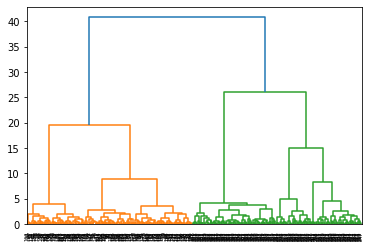

In [ ]:
#Dendogram
data = list(zip(list(df2.iloc[:,1]),list(df2.iloc[:,2]), list(df2.iloc[:,3])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#Heirarchial Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(data) 
print('Accuracy: ', metrics.accuracy_score(df2['Class'], labels))
print('F1-score: ', metrics.f1_score(df2.iloc[:,4],labels, average='macro'))

Accuracy:  0.4975247524752475
F1-score:  0.1642810373221691


In [ ]:
##3d plot of the data with true labels
fig = px.scatter_3d(df2, x=df2.iloc[:,1], y=df2.iloc[:,2], z=df2.iloc[:,3],color=df2.iloc[:,4])
fig.show()

In [ ]:
#3d plot of the data after hierarchial clustering
fig = px.scatter_3d(df2, x=df2.iloc[:,1], y=df2.iloc[:,2], z=df2.iloc[:,3],color=labels)
fig.show()

#Data 3

In [ ]:
df3 = pd.read_csv('Data3.csv')
x = df3.iloc[:,1:4].values

In [ ]:
#K-means
mdl = KMeans(n_clusters=4)
mdl.fit(df3.iloc[:,1:4])
print('SSE: '+ str(mdl.inertia_))
y_clusters = mdl.fit_predict(x)

print('Accuracy: ', metrics.accuracy_score(df3['Class'], y_clusters))
print('F1-score: ', metrics.f1_score(df3.iloc[:,4],y_clusters, average='macro'))

SSE: 229.0487999751335
Accuracy:  0.75
F1-score:  0.6


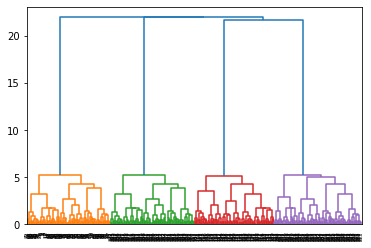

In [ ]:
#Dendogram
data = list(zip(list(df3.iloc[:,1]),list(df3.iloc[:,2]), list(df3.iloc[:,3])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#Heirarchial Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print('Accuracy: ', metrics.accuracy_score(df3['Class'], labels))
print('F1-score: ', metrics.f1_score(df3.iloc[:,4],labels, average='macro'))

Accuracy:  0.25
F1-score:  0.2


In [ ]:
##3d plot of the data with true labels
fig = px.scatter_3d(df3, x=df3.iloc[:,1], y=df3.iloc[:,2], z=df3.iloc[:,3],color=df3.iloc[:,4])
fig.show()

In [ ]:
#3d plot of the data after Kmeans clustering
fig = px.scatter_3d(df3, x=df3.iloc[:,1], y=df3.iloc[:,2], z=df3.iloc[:,3],color=y_clusters)
fig.show()

#Data 4

In [ ]:
import pandas as pd
df4 = pd.read_csv('Data4.csv')
df4.loc[df4['Class']==1, 'Class']=0
df4.loc[df4['Class']==2, 'Class']=1
x = df4.iloc[:,1:4].values

In [ ]:
#K-means
mdl = KMeans(n_clusters=2)
mdl.fit(df4.iloc[:,1:4])
print('SSE: '+ str(mdl.inertia_))
y_clusters = mdl.fit_predict(x)

print('Accuracy: ', metrics.accuracy_score(df4['Class'], y_clusters))
print('F1-score: ', metrics.f1_score(df4.iloc[:,4],y_clusters, average='macro'))

SSE: 719.3443269685367
Accuracy:  0.653
F1-score:  0.6529996529996529


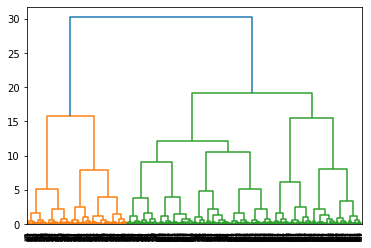

In [ ]:
#Dendogram
data = list(zip(list(df4.iloc[:,1]),list(df4.iloc[:,2]), list(df4.iloc[:,3])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#Heirarchial Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print('Accuracy: ', metrics.accuracy_score(df4['Class'], labels))
print('F1-score: ', metrics.f1_score(df4.iloc[:,4],labels, average='macro'))

Accuracy:  0.201
F1-score:  0.16736053288925895


In [ ]:
#3d plot of the data with true labels
fig = px.scatter_3d(df4, x=df4.iloc[:,1], y=df4.iloc[:,2], z=df4.iloc[:,3],color=df4.iloc[:,4])
fig.show()

In [ ]:
#3d plot of the data after Kmeans clustering
fig = px.scatter_3d(df4, x=df4.iloc[:,1], y=df4.iloc[:,2], z=df4.iloc[:,3],color=y_clusters)
fig.show()

#Data 5

In [ ]:
df5 = pd.read_csv('Data5.csv')
df5.loc[df5['Class']==1, 'Class']=0
df5.loc[df5['Class']==2, 'Class']=1
x = df5.iloc[:,1:4].values

In [ ]:
#K-means
mdl = KMeans(n_clusters=2)
mdl.fit(df5.iloc[:,1:4])
print('SSE: '+ str(mdl.inertia_))
y_clusters = mdl.fit_predict(x)

print('Accuracy: ', metrics.accuracy_score(df5['Class'], y_clusters))
print('F1-score: ', metrics.f1_score(df5.iloc[:,4],y_clusters, average='macro'))

SSE: 754086.0396742994
Accuracy:  0.7175
F1-score:  0.6929994362600268


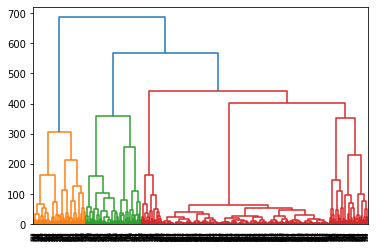

In [ ]:
#Dendogram
data = list(zip(list(df5.iloc[:,1]),list(df5.iloc[:,2]), list(df5.iloc[:,3])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#Heirarchial Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print('Accuracy: ', metrics.accuracy_score(df5['Class'], labels))
print('F1-score: ', metrics.f1_score(df5.iloc[:,4],labels, average='macro'))

Accuracy:  0.3425
F1-score:  0.25512104283054005


In [ ]:
#3D Plot of the data with true labels
fig = px.scatter_3d(df5, x=df5.iloc[:,1], y=df5.iloc[:,2], z=df5.iloc[:,3],color=df5.iloc[:,4])
fig.show()

In [ ]:
#3d plot of the data after kmeans clustering
fig = px.scatter_3d(df5, x=df5.iloc[:,1], y=df5.iloc[:,2], z=df5.iloc[:,3],color=y_clusters)
fig.show()

#Data 6

In [ ]:
import pandas as pd
df6 = pd.read_csv('Data6.csv')
df6.loc[df6['Class']==1, 'Class']=0
df6.loc[df6['Class']==2, 'Class']=1
x = df6.iloc[:,1:3].values

In [ ]:
#K-means
mdl = KMeans(n_clusters=2)
mdl.fit(df6.iloc[:,1:3])
print('SSE: '+ str(mdl.inertia_))
y_clusters = mdl.fit_predict(x)

print('Accuracy: ', metrics.accuracy_score(df6['Class'], y_clusters))
print('F1-score: ', metrics.f1_score(df6.iloc[:,3],y_clusters, average='macro'))

SSE: 11775.002373181256
Accuracy:  0.951416015625
F1-score:  0.9513828386139447


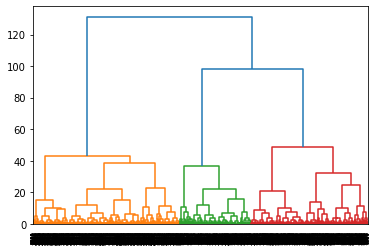

In [ ]:
#Dendogram
data = list(zip(list(df6.iloc[:,1]),list(df6.iloc[:,2])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#Heirarchial Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print('Accuracy: ', metrics.accuracy_score(df6['Class'], labels))
print('F1-score: ', metrics.f1_score(df6.iloc[:,3],labels, average='macro'))

Accuracy:  0.923828125
F1-score:  0.9235478572495148


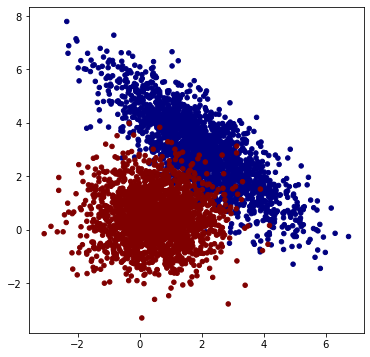

In [ ]:
#2D Plot of data with true labels
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(df6.iloc[:,1],df6.iloc[:,2],s=20,c=df6.iloc[:,3], marker = 'o', cmap = cm.jet );

plt.show()

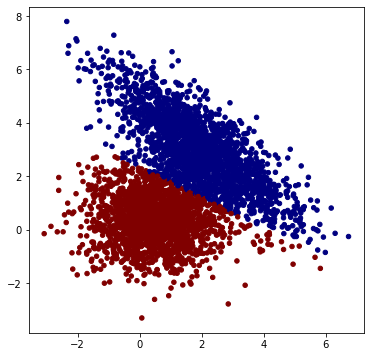

In [ ]:
#2D Plot of the data after kmeans clustering
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(df6.iloc[:,1],df6.iloc[:,2],s=20,c=y_clusters, marker = 'o', cmap = cm.jet );

plt.show()

#Data 7

In [ ]:
import pandas as pd
df7 = pd.read_csv('Data7.csv')
x = df7.iloc[:,1:3].values

In [ ]:
#K-means
mdl = KMeans(n_clusters=6)
mdl.fit(df7.iloc[:,1:3])
print('SSE: '+ str(mdl.inertia_))
y_clusters = mdl.fit_predict(x)

print('Accuracy: ', metrics.accuracy_score(df7['Class'], y_clusters))
print('F1-score: ', metrics.f1_score(df7.iloc[:,3],y_clusters, average='macro'))

SSE: 274.09179396256525
Accuracy:  0.6012987012987013
F1-score:  0.18793503480278423


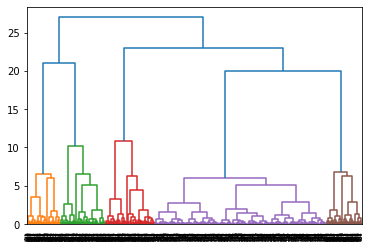

In [ ]:
#Dendogram
data = list(zip(list(df7.iloc[:,1]),list(df7.iloc[:,2])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#Heirarchial Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print('Accuracy: ', metrics.accuracy_score(df7['Class'], labels))
print('F1-score: ', metrics.f1_score(df7.iloc[:,3],labels, average='macro'))

Accuracy:  0.1012987012987013
F1-score:  0.05019305019305019


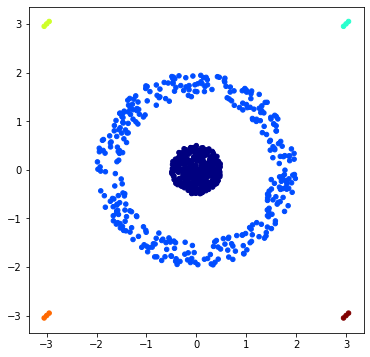

In [ ]:
#2D Plot of the data with true labels
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(df7.iloc[:,1],df7.iloc[:,2],s=20,c=df7.iloc[:,3], marker = 'o', cmap = cm.jet );

plt.show()

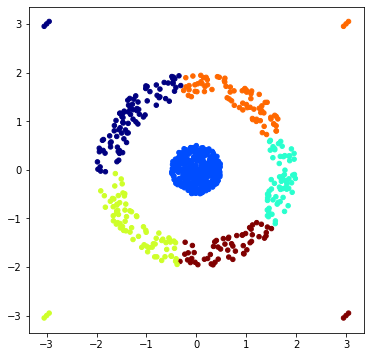

In [ ]:
#2D Plot of the data after kmeans clustering
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(df7.iloc[:,1],df7.iloc[:,2],s=20,c=y_clusters, marker = 'o', cmap = cm.jet );

plt.show()

#Data 8

In [ ]:
df8 = pd.read_csv('Data8.csv')
df8.loc[df8['Class']==1, 'Class']=0
x = df8.iloc[:,1:4].values

In [ ]:
#K-means
mdl = KMeans(n_clusters=1)
mdl.fit(df7.iloc[:,1:4])
print('SSE: '+ str(mdl.inertia_))
y_clusters = mdl.fit_predict(x)

print('Accuracy: ', metrics.accuracy_score(df8['Class'], y_clusters))
print('F1-score: ', metrics.f1_score(df8.iloc[:,4],y_clusters, average='macro'))

SSE: 1717.3306368370584
Accuracy:  1.0
F1-score:  1.0


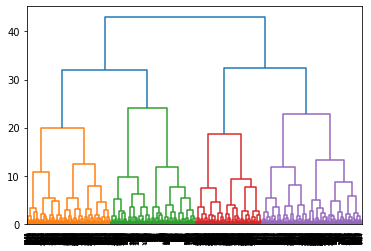

In [ ]:
#Dendogram
data = list(zip(list(df8.iloc[:,1]),list(df8.iloc[:,2]),list(df8.iloc[:,3])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#Heirarchial Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print('Accuracy: ', metrics.accuracy_score(df8['Class'], labels))
print('F1-score: ', metrics.f1_score(df8.iloc[:,4],labels, average='macro'))

Accuracy:  1.0
F1-score:  1.0


In [ ]:
#3D Plot of data with true labels
fig = px.scatter_3d(df8, x=df8.iloc[:,1], y=df8.iloc[:,2], z=df8.iloc[:,3],color=df8.iloc[:,4])
fig.show()

In [ ]:
#3D Plot of predicted values
fig = px.scatter_3d(df8, x=df8.iloc[:,1], y=df8.iloc[:,2], z=df8.iloc[:,3],color=y_clusters)
fig.show()

#TASK 2


In [ ]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pylab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving World Indicators.csv to World Indicators.csv


In [ ]:
df = pd.read_csv('World Indicators.csv')
dft = df
dft

In [ ]:
#finding percentage of null values in each column
dft.isnull().sum()/len(df)

Birth Rate                0.043269
Business Tax Rate         0.129808
Days to Start Business    0.129808
Energy Usage              0.346154
GDP                       0.096154
Health Exp % GDP          0.110577
Health Exp/Capita         0.110577
Hours to do Tax           0.134615
Infant Mortality Rate     0.096154
Internet Usage            0.043269
Lending Interest          0.370192
Life Expectancy Female    0.052885
Life Expectancy Male      0.052885
Mobile Phone Usage        0.057692
Population 0-14           0.081731
Population 15-64          0.081731
Population 65+            0.081731
Population Urban          0.009615
Region                    0.000000
Country                   0.000000
dtype: float64

In [ ]:
#dropping columns with high % of null values
dft = dft.drop(['Energy Usage', 'Lending Interest'], axis=1)

In [ ]:
#dropping rows that have more than 3 na values. Number 3 is chosen as any higher number would mean we would lose a lot of data.
#we could go with threshold 20 but since we have very few records, it is better to keep as much as possible and impute missing data.
dft = dft.dropna(thresh=17)

In [ ]:
#checking columns that have still have null values to impute with mean/median values
dft.isnull().sum()/len(df)

Birth Rate                0.000000
Business Tax Rate         0.000000
Days to Start Business    0.000000
GDP                       0.004808
Health Exp % GDP          0.000000
Health Exp/Capita         0.000000
Hours to do Tax           0.004808
Infant Mortality Rate     0.000000
Internet Usage            0.000000
Life Expectancy Female    0.000000
Life Expectancy Male      0.000000
Mobile Phone Usage        0.004808
Population 0-14           0.000000
Population 15-64          0.000000
Population 65+            0.000000
Population Urban          0.000000
Region                    0.000000
Country                   0.000000
dtype: float64

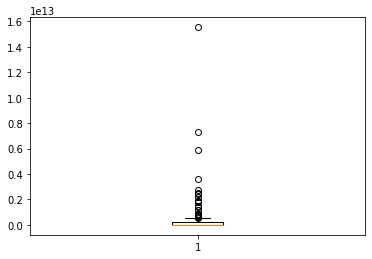

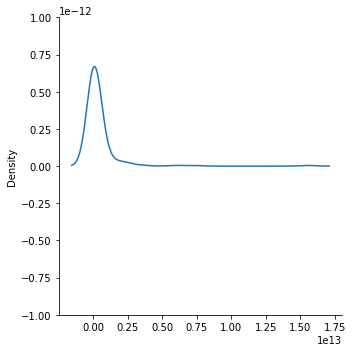

In [ ]:
# viewing the distribution of GDP to select mean or median to fill the missing values
A = dft['GDP']
A = [float(str(x)[1:].replace(",","")) for x in A if str(x) != 'nan']
pylab.figure()
pylab.boxplot(A)
pylab.show()
import seaborn as sns
sns.displot(A, kind='kde')

In [ ]:
#identifying rows with null values in GDP column
print(dft[dft['GDP'].isna()])

     Birth Rate Business Tax Rate  Days to Start Business  GDP  \
145       0.025             39.7%                    13.0  NaN   

     Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
145             0.034              $102            336.0   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
145                  0.013             0.2                    78.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
145                  72.0                 0.6            0.355   

     Population 15-64  Population 65+  Population Urban       Region  \
145             0.607           0.038             0.561  Middle East   

                  Country  
145  Syrian Arab Republic  


In [ ]:
#imputing missing gdp values with median as distribution is skewed

A = [float(str(x)[1:].replace(",","")) if str(x) != 'nan' else np.median(A) for x in dft['GDP']]

In [ ]:
dft['GDP'] = A

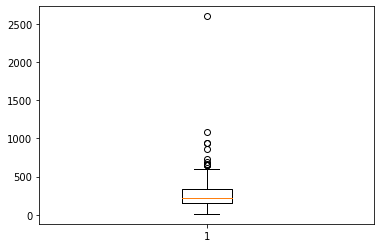

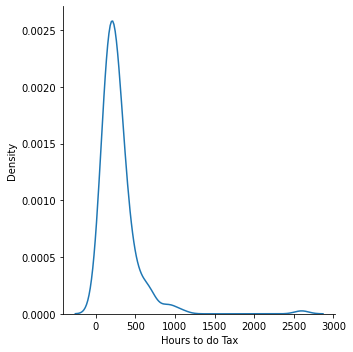

In [ ]:
# viewing the distribution of Hours to do Tax to select mean or median to fill the missing values
A = dft['Hours to do Tax']
pylab.figure()
pylab.boxplot(A[~np.isnan(A)])
pylab.show()

import seaborn as sns
sns.displot(A[~np.isnan(A)], kind='kde')

In [ ]:
#identifying rows with null values in Hours to do Tax column
print(dft[dft['Hours to do Tax'].isna()])

    Birth Rate Business Tax Rate  Days to Start Business           GDP  \
73       0.022              9.3%                     9.0  2.162990e+09   

    Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
73             0.081              $525              NaN   

    Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
73                   0.01             0.3                    78.0   

    Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
73                  76.0                 1.6            0.294   

    Population 15-64  Population 65+  Population Urban Region   Country  
73             0.655            0.05             0.412   Asia  Maldives  


In [ ]:
#imputing missing gdp values with median as distribution is skewed
A[np.isnan(A)] = np.median(A[~np.isnan(A)])
print(A.isnull().sum()/len(df))
dft['Hours to do Tax'] = A

0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



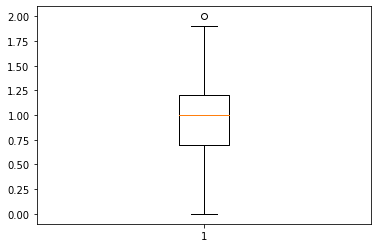

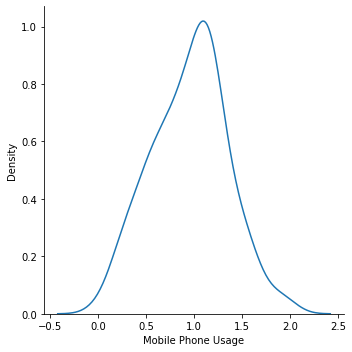

In [ ]:
# viewing the distribution of Mobile Phone usage to select mean or median to fill the missing values
A = dft['Mobile Phone Usage']
pylab.figure()
pylab.boxplot(A[~np.isnan(A)])
pylab.show()

import seaborn as sns
sns.displot(A[~np.isnan(A)], kind='kde')

In [ ]:
#imputing missing values with median as distribution is skewed
A = dft['Mobile Phone Usage']
A[np.isnan(A)] = np.median(A[~np.isnan(A)])
print(A.isnull().sum()/len(df))
dft['Mobile Phone Usage'] = A

0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# business tax rate and health exp/capita columns are strings. converting to float
dft['Business Tax Rate'] = [float(str(x)[:-1]) for x in dft['Business Tax Rate']]
dft['Health Exp/Capita'] = [float(str(x)[1:].replace(',','')) for x in dft['Health Exp/Capita']]
dft

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4.363219e+09,0.060,490.0,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
202,0.015,29.1,41.0,2.367635e+10,0.053,935.0,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [ ]:
#normalizing all numeric columns due to the scale differences
dft[dft.columns[0:16]] = MinMaxScaler().fit_transform(dft[dft.columns[0:16]])
dft

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933,Africa,Algeria
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262,Africa,Angola
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630,Africa,Benin
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503,Africa,Botswana
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077,The Americas,Suriname
202,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000,The Americas,Trinidad and Tobago
204,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340,The Americas,United States
205,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724,The Americas,Uruguay


For n_clusters = 2
The average silhouette_score is : 0.42343083018453914
For n_clusters = 3
The average silhouette_score is : 0.31858291575260744
For n_clusters = 4
The average silhouette_score is : 0.2618336150549978
For n_clusters = 5
The average silhouette_score is : 0.23188699159811407
For n_clusters = 6
The average silhouette_score is : 0.2363721179547818


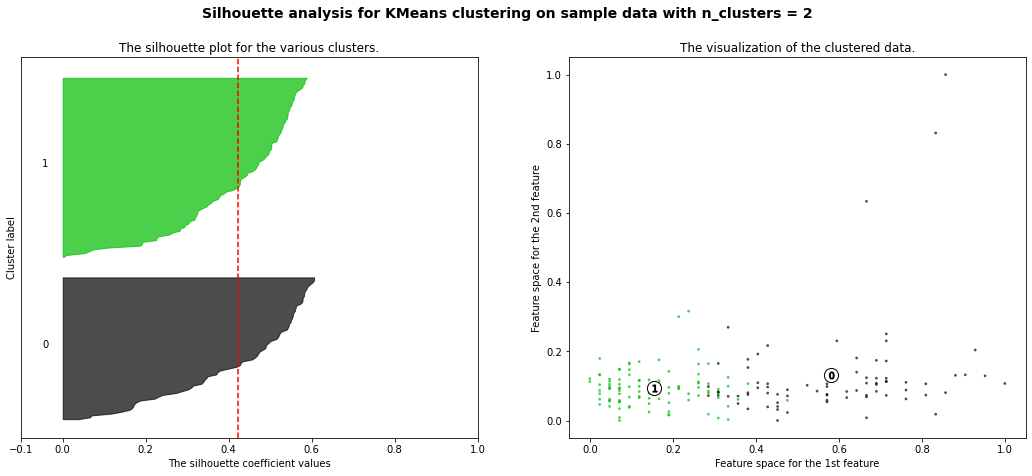

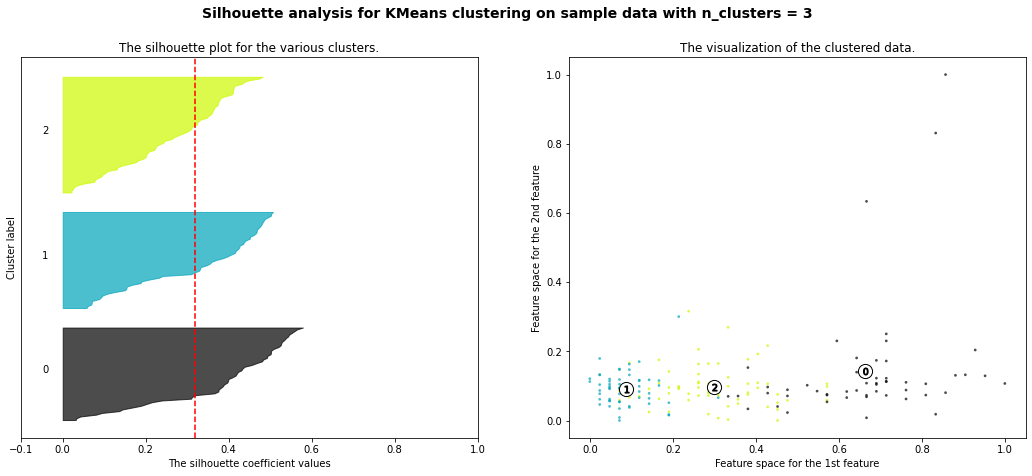

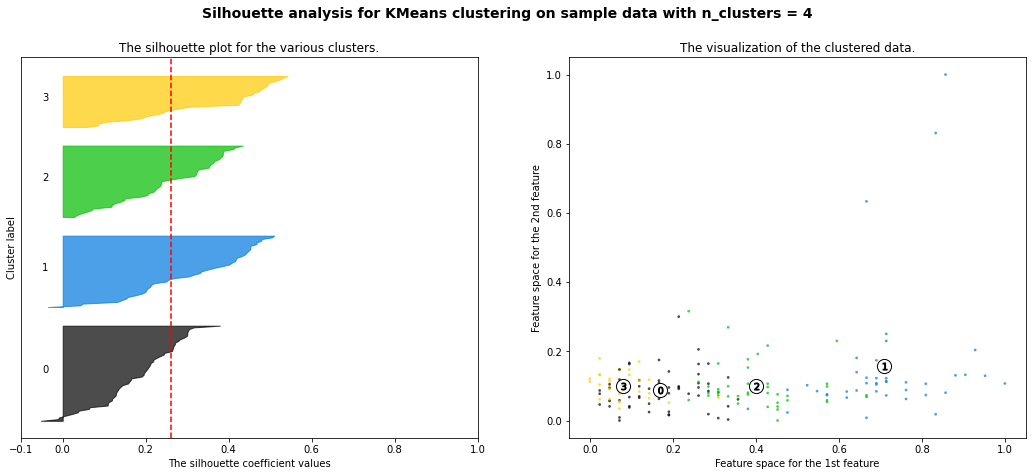

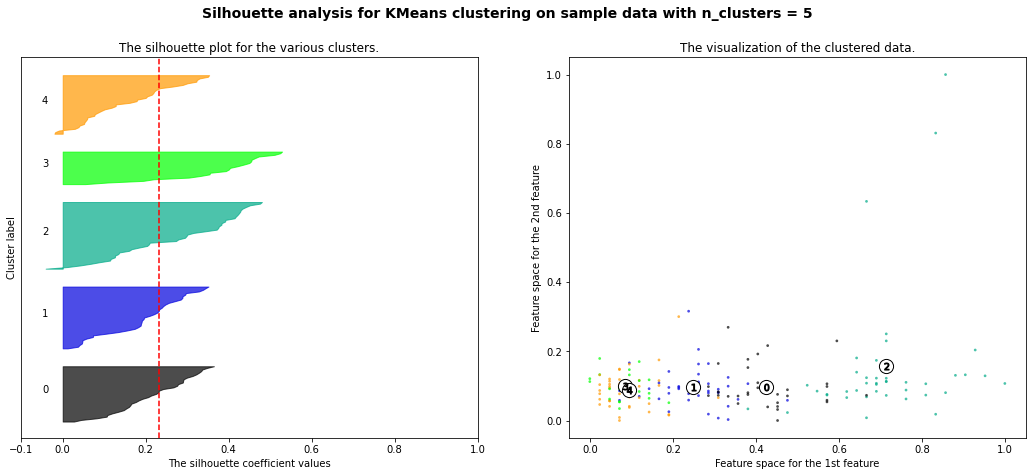

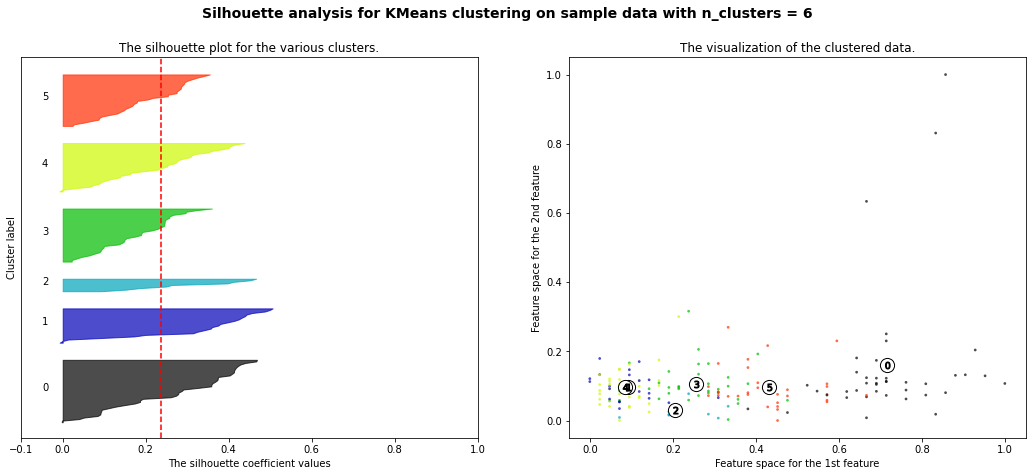

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]
X = dft.iloc[:,0:16].values
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but for this task, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette  plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters)
    print("The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Average SH score nearing to 1 indicates the points in a cluster are far away from the other clusters and if it is nearing to 0, the points are closer to the decision boundaries between two clusters. The thickness of the plots indicate how how many samples are grouped together. The thicker the plots are, there's a greater chance that samples from different subplots are grouped into one.

Though the plots for number of clusters = 3, look evenly distributed, there is a drastic drop of average SH score from 0.42 for n=2 to 0.31 for n=3. Hence, we are choosing n=2 for clustering the records.

In [ ]:
#Applying K means elbow method to identify the best number of clusters to divide the data
x = dft.iloc[:,0:16].values
from sklearn.cluster import KMeans
result = []
for i in range(2,10):
  mdl = KMeans(n_clusters=i)
  mdl.fit(dft.iloc[:,0:16])
  result.append(mdl.inertia_)
  print('SSE Cohesive Data: '+ str(mdl.inertia_))

SSE Cohesive Data: 58.86306505043245
SSE Cohesive Data: 44.40829930140265
SSE Cohesive Data: 37.31005157451705
SSE Cohesive Data: 33.96261052835624
SSE Cohesive Data: 31.29388256963385
SSE Cohesive Data: 29.326408561493594
SSE Cohesive Data: 27.956303180297972
SSE Cohesive Data: 26.716097521912552


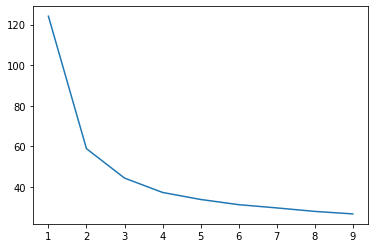

In [ ]:
sns.lineplot(y=result, x=range(1,10))

In [ ]:
#Finding the SSE for n_clusters=2 and fitting the model
from sklearn.cluster import KMeans
mdl = KMeans(n_clusters=2)
mdl.fit(dft.iloc[:,0:16])
print('SSE: '+ str(mdl.inertia_))

SSE: 58.86306505043245


In [ ]:
#Finding the CH score
from sklearn import metrics
print('CH Score: '+ str(metrics.calinski_harabasz_score(dft.iloc[:,0:16], mdl.labels_)))

CH Score: 190.5805370273086


In [ ]:
!pip install validclust

In [ ]:
#Finding the Dunn Indec
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(dft.iloc[:,0:16])
print('Dunn: ', dunn(dist,  mdl.labels_))

Dunn:  0.12192108167876109


In [ ]:
#finding the SH Score
from sklearn import metrics
print('SHScore: '+ str(metrics.silhouette_score(dft.iloc[:,0:16], mdl.labels_)))

SHScore: 0.42343083018453914


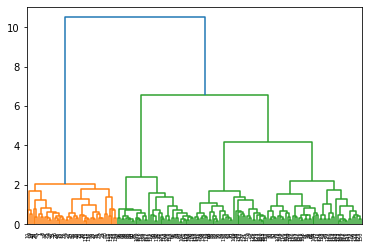

In [ ]:
#Creating dendogram for the data using ward method and euclidean metric
from scipy.cluster.hierarchy import dendrogram, linkage
data = list(zip(list(dft.iloc[:,0]),list(dft.iloc[:,1]),list(dft.iloc[:,2]),list(dft.iloc[:,3]),list(dft.iloc[:,4]),list(dft.iloc[:,5]),list(dft.iloc[:,6]),list(dft.iloc[:,7]),list(dft.iloc[:,8]),list(dft.iloc[:,9]),list(dft.iloc[:,10]),list(dft.iloc[:,11]),list(dft.iloc[:,12]),list(dft.iloc[:,13]),list(dft.iloc[:,14]),list(dft.iloc[:,15])))
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
#Creating the model and dividing the data into 2 clusters. Labels is the predicted cluster list.
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 

#Finding the CH score
from sklearn import metrics
print('CH Score: '+ str(metrics.calinski_harabasz_score(dft.iloc[:,0:16],labels)))

#Finding the Dunn Index
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(dft.iloc[:,0:16])
print('Dunn: ', dunn(dist, labels))

#finding the SH Score for Hierarcial clustering method
from sklearn import metrics
print('SHScore: '+ str(metrics.silhouette_score(dft.iloc[:,0:16], labels)))

CH Score: 138.1209314160776
Dunn:  0.15867095070869494
SHScore: 0.38821276901188606


As CH and SH scores of KMeans clustering method is greater than those of Hierarchial Clustering, KMeans is the better choice for clustering for this dataset. Creating scatter plots using the cluster labels generated through KMeans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



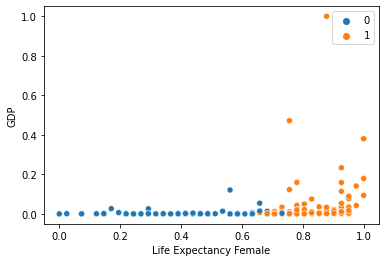

In [ ]:
sns.scatterplot('Life Expectancy Female', 'GDP', data=dft, hue=mdl.labels_)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



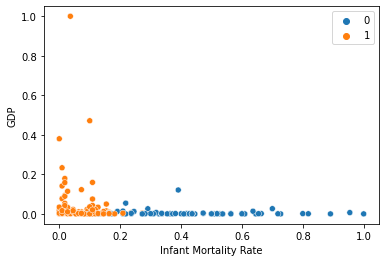

In [ ]:
sns.scatterplot('Infant Mortality Rate', 'GDP', data=dft, hue=mdl.labels_)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



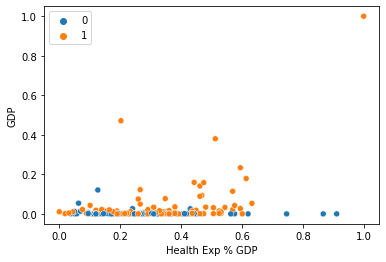

In [ ]:
sns.scatterplot('Health Exp % GDP', 'GDP', data=dft, hue=mdl.labels_)
plt.show()

In [ ]:
!jupyter nbconvert --to html Project1_Group31.ipynb

[NbConvertApp] Converting notebook Project1_Group31.ipynb to html
[NbConvertApp] Writing 1753390 bytes to Project1_Group31.html
